# Data Science Project: Assessment 2

**Student ID**: `201912890`

**Link to GitHub**: [Lucinbell/OMAT5204M-DS/Summative Assessment 2](https://github.com/Lucinbell/OMAT5204M-DS/tree/main/Summative%20Assessment%202)

## Case study

Refer to the brief

## 1. Aims, objectives and plan (2 marks)

### a) Aims and objectives

This project aims to predict residential rent per square meter using real estate listing data from Tokyo. The goal is to compare the performance of two techniques, ridge regression and a neural network (MLP), in terms of accuracy, generalizability, and interpretability.

Key objectives include:
- preprocessing and encoding relevant features
- training and tuning both models using cross-validation
- evaluate performance on withheld, unseen data, and
- analyzing their strengths and limitations

The project also considers real world deployment by reflecting on model consistency, overfitting risk and data diversity beyond the training sample.

**Note on Data**:
The dataset used in this project is self-collected via a custom webscraper built in R targeting a major Japanese rental listing website. The data was collected as part of a personal research project. You can see a demo of the webscraper in my [GitHub repo](https://github.com/Lucinbell/OMAT5204M-DS/tree/main/Summative%20Assessment%202/R_webscraper_demo).
It contains structured information about individual rental properties in Shinjuku, Shibuya, and Minato wards, including building age, floor area, proximity to train stations, and various amenities. The data was collected solely for academic purposes and is not redistributed.

###  b) Plan
Please demonstrate how you have conducted the project with a simple Gantt chart.

## Project Plan (Gantt Chart)

| Task                            | Day 1 | Day 2 | Day 3 | Day 4 | Day 5 | Day 6 |
|---------------------------------|--------|--------|--------|--------|--------|--------|
| Finalize dataset & scope     |   ✅    |        |        |        |        |        |
| EDA & Preprocessing           |        |   🟩    |   🟩    |        |        |        |
| Ridge Regression modeling    |       |        |   🟦    |   🟦    |        |        |
| MLP Regression modeling      |        |       |        |   🟪    |   🟪    |        |
| Model comparison & evaluation   |        |        |        |        |   🔷    |        |
| Report write-up & polishing   |        |        |        |        |   📝    |   📝    |
| Video recording & submission   |        |        |        |        |        |   🎥    |


## 2. Understanding the case study (2 marks)

###  Case study analysis
Renting an apartment in Tokyo can be overwhelming. With thousands of listings differing in size, location, amenities, and price, both renters and landlords face the challenge of estimating fair rental value. This project addresses that challenge by developing a rent prediction model for central Tokyo, focusing on three key wards: Shinjuku, Shibuya, and Minato.

The task is framed as a supervised regression problem, where the goal is to predict monthly rent based on features such as:
- Floor area (in square meters)
- Building age
- Walking time to the nearest station
- Property type
- Amenities (e.g., bath/toilet separation, internet access, flooring)

The model can serve as a pricing tool for prospective renters to benchmark offers, or for landlords seeking guidance in setting competitive rental prices. Data was collected independently via webscraping and includes listing-level records with both numeric and categorical features.




## 3. Pre-processing applied (40 marks)
Enter the code in the cells below to execute each of the stated sub-tasks. 


###  a) Merging, pivoting and melting, if necessary. 

In [5]:
# Load the data
import pandas as pd
import os

# File path
folder = "tokyo_rent"
files = ["final_Minato-ku_13103.csv",
         "final_Shibuya-ku_13113.csv",
         "final_Shinjuku-ku_13104.csv"]

# Load and merge the files
dfs = []
for f in files:
    df = pd.read_csv(os.path.join(folder, f))
    dfs.append(df)

# Concatenate into one DataFrame
df_tokyo = pd.concat(dfs, ignore_index = True)

# Quick check on dimension
print(df_tokyo.shape)

# And the first few rows
df_tokyo.head()

(4350, 50)


,parsed_area,listing_id,building_name,address,building_type,structure,listing_floor,building_total_floor,parking_type,parking_distance_m,...,furniture_set,appliance_set,has_balcony,system_kitchen,open_kitchen,IH_cooktop,contract_type,agency,last_update,detail_url
0,Minato-ku,100430282594,レジディアタワー麻布十番,東京都港区三田１,マンション,鉄筋コン,10.0,25.0,on-premise,0.0,...,False,False,False,True,False,False,定期借家2年,シェルビー不動産(株)ROGER ROOM,2025/04/28,https://suumo.jp/chintai/jnc_000098351046/?bc=...
1,Minato-ku,100434838103,三田ガーデンヒルズ Ｎ,東京都港区三田１,マンション,鉄筋コン,13.0,14.0,not-listed,NaN,...,False,False,True,True,True,False,定期借家2年,(株)Lim estate,2025/04/28,https://suumo.jp/chintai/jnc_000098269994/?bc=...
2,Minato-ku,100429938966,三田ガーデンヒルズイーストヒル,東京都港区三田１,マンション,鉄筋コン,5.0,14.0,not-listed,NaN,...,False,False,True,True,True,False,定期借家3年,(株)ケン・コーポレーション横浜支店,2025/04/28,https://suumo.jp/chintai/jnc_000098103421/?bc=...
3,Minato-ku,100425742351,三田ガーデンヒルズイーストヒル,東京都港区三田１,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://suumo.jp/chintai/jnc_000097650560/?bc=...
4,Minato-ku,100436583745,三田ガーデンヒルズイーストヒル,東京都港区三田１,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://suumo.jp/chintai/jnc_000098399831/?bc=...


###  b) Preparing the labels appropriately, if necessary.


In [6]:
# Note: rent unit is in 10,000 JPY, so times 10k to return to 1 JPY
df_tokyo["rent_per_sqm"] = (df_tokyo["rent"] * 10000) / df_tokyo["listing_area"]

# Preview new col
df_tokyo[["rent", "listing_area", "rent_per_sqm"]].head()

,rent,listing_area,rent_per_sqm
0,28.4,54.91,5172.099800
1,170.0,100.24,16959.297686
2,118.0,85.01,13880.719915
3,110.0,NaN,NaN
4,200.0,NaN,NaN


###  d) Dealing with duplicate values, if necessary.


In [158]:
# NA

### i) Appropriate feature extraction, if necessary.

To enhance predictive performance, several features were engineered from existing string and numeric columns:

- `n_station_sub_10min` is calculated to reflect transit accessibility.
- `room_count` was parsed from the layout string (e.g., "2LDK") or set to 1 for studio-type rooms ("ワンルーム").
- `w_l`, `w_d`, `w_k`, and `w_s` are binary indicators capturing common room types.
    - Example: "2LDK" -> `w_l` = True, `w_d` = True, `w_k` = True, `w_s` = False
- `total_partitions` represents the sum of rooms and components, serving as a proxy for apartment complexity.
- `area_per_partition` normalizes size by partition count.
- `n_station_sub_10min` counts how many train stations are within 10 minutes walking distance.

These derived features enrich the dataset and help represent subtle structure in layout and location.


In [7]:
# Count number of stations within 10 min walking distance
## First create bool dataframe of < 10 min for each walk time
walk_bools = df_tokyo[["walk_time_1", "walk_time_2", "walk_time_3"]] < 10

## Sum across bool columns, skip NAs
df_tokyo["n_station_sub_10min"] = walk_bools.sum(axis=1)

# Extract number of rooms (e.g. "1LDK" ->  1)
df_tokyo["room_count"] = df_tokyo["layout"].str.extract(r"^(\d+)") # Extract digits
df_tokyo.loc[df_tokyo["layout"] == "ワンルーム", "room_count"] = 1  # "ワンルーム" = "One Room"
df_tokyo["room_count"] = pd.to_numeric(df_tokyo["room_count"], errors="coerce") # covert to numeric

# Binary indicators for layout compoenents
df_tokyo["w_s"] = df_tokyo["layout"].str.contains("S", na = False) # S = storage, usually walk-in closet
df_tokyo["w_l"] = df_tokyo["layout"].str.contains("L", na = False) # L = living room
df_tokyo["w_d"] = df_tokyo["layout"].str.contains("D", na = False) # D = dining room
df_tokyo["w_k"] = df_tokyo["layout"].str.contains("K", na = False) # K = kitchen

# Total Number of Layout Partitions
df_tokyo["total_partitions"] = (
    df_tokyo["room_count"].fillna(0) + df_tokyo[["w_s", "w_l", "w_d", "w_k"]].sum(axis=1)
)

# Average area per partition
df_tokyo["area_per_partition"] = df_tokyo["listing_area"] / df_tokyo["total_partitions"]

# Check output
df_tokyo[["n_station_sub_10min", "layout", "room_count", "w_s", "w_l", "w_d", "w_k", "total_partitions", "area_per_partition"]].head()

,n_station_sub_10min,layout,room_count,w_s,w_l,w_d,w_k,total_partitions,area_per_partition
0,2,1LDK,1,False,True,True,True,4,13.7275
1,2,2LDK,2,False,True,True,True,5,20.0480
2,2,2LDK,2,False,True,True,True,5,17.0020
3,2,2LDK,2,False,True,True,True,5,NaN
4,2,3LDK,3,False,True,True,True,6,NaN


### j) Identifying and dealing with class imbalance, if necessary.

Rental properties in the Tokyo central areas are primarily multiplex/high-rise apartment. Detached houses are **very rare**. For the purpose of this analysis we will only focus on multiplex units, of the `building_type`:
- "マンション" = condominium
- "アパート" = apartment

Note that this also has the effect of removing rows where `building_type` is missing. The rows where `building_type` is missing also has other key information such as `listing_area`, `structure`, and other amenities indicators missing. These missing values were caused by slight inconsistencies in the listing page HTML layout during web scraping. Preliminary checks suggest the missingness is random rather than systematically tied to rent or location. Therefore, for simplicity and reliability, rows with missing values in essential predictors were dropped.

In [8]:
# Filter for multiplex units only
multiplex_types = ["マンション", "アパート"]
df_tokyo = df_tokyo[df_tokyo["building_type"].isin(multiplex_types)].copy()

# Check
df_tokyo["building_type"].value_counts()

building_type
マンション    2933
アパート      261
Name: count, dtype: int64

### h) Appropriate feature selection such as RFE, if necessary.

Since the data is not really high-dimensional (number of columns < 100), I have elected to select relevant columns based on domain knowledge.

In [9]:
relevant_columns = [
    # Response
    "rent_per_sqm",

    # Listing Info
    "parsed_area", "building_type",
    "structure", "listing_floor", "building_total_floor",
    "parking_type", "room_facing", "listing_area",
    "building_age", "sep_bath_toilet", "washlet",
    "reheat_bath", "dryer_in_bathroom", "sep_bath_sink",
    "aircon", "indoor_laundry_slot", "heated_floor",
    "pet_ok", "free_internet", "furniture_set",
    "has_balcony", "system_kitchen", "open_kitchen", "IH_cooktop",
    "n_station_sub_10min", "walk_time_1", "room_count",
    "w_s", "w_l", "w_d", "w_k", "total_partitions", "area_per_partition"
]

df_tokyo_target = df_tokyo[relevant_columns]


###  c)  Dealing with missing values (imputation, filtering) without leaking, if necessary.

One more look at missing values.



In [10]:
# Check missing value again
missing_summary = df_tokyo_target.isnull().sum() 
missing_summary = missing_summary[missing_summary > 0]

print(missing_summary)



listing_floor    18
parking_type      1
dtype: int64


In [12]:

# Drop rows with missing listing_floor
df_tokyo_target = df_tokyo_target.dropna(subset=['listing_floor'])

# Drop rows with missing parking_type
df_tokyo_target = df_tokyo_target.dropna(subset=['parking_type'])

# Reset index after row drop
df_tokyo_target.reset_index(drop=True, inplace=True)

### e) Dealing with correlation and collinearity, if necessary

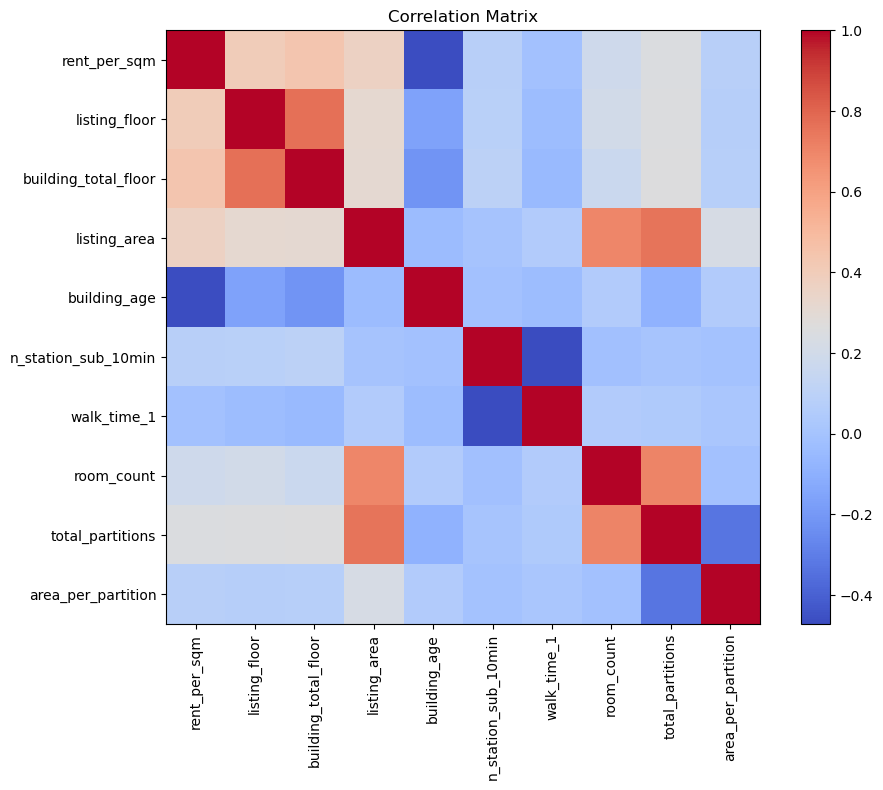

In [13]:
import matplotlib.pyplot as plt

corr = df_tokyo_target.select_dtypes(include="number").corr()

plt.figure(figsize = (10, 8))
plt.imshow(corr, cmap = "coolwarm", interpolation = "none")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation = 90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Observations on Correlation Matrix

- `building_total_floor` vs. `listing_floor`: correlated naturally because taller buildings have more floors, but each provides distinct context. Both were retained.
- `room_count` vs. `listing_area`: larger area listings tend to offer more rooms.
- `total_partitions` vs. both `listing_area` and `room_count`: `total_partitions` is a derived feature combining `room_count` and presence of additional layout zones (L, D, K, S).

**Decision**: `room_count` to be dropped to reduce redundancy. 
- `building_total_floor`, `listing_floor`, `total_partitions` each offer distinct info so retained in input data.

In [14]:
df_tokyo_target.drop(columns = ["room_count"], inplace = True)

### g) Variance analysis, if necessary.

In [15]:
# Check column with 1 or less unique values
low_var_cols = df_tokyo_target.columns[df_tokyo_target.nunique() <= 1]
print("Low variance columns:", low_var_cols.tolist())

Low variance columns: []


### k) Identifying and dealing with outliers, if necessary.

Rent per square meter distribution has very pronounced right-ward tail, largely due to presence of ultra luxury condominums.
Group-wise (by `building_type`) filtering considered but deemed unncessary due to alignment in distributions and the nature of the extreme outliers.

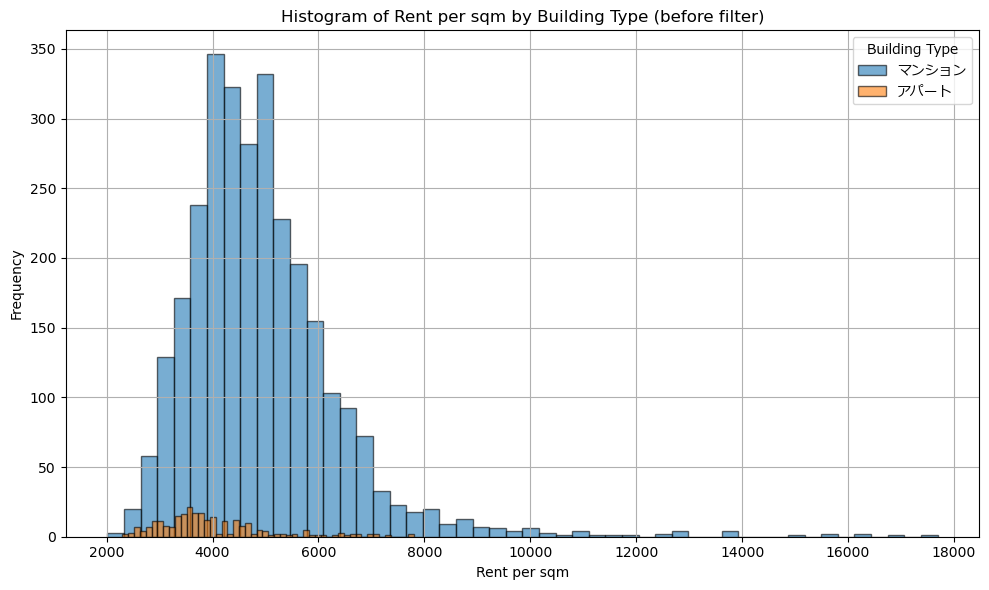

In [16]:
import matplotlib.pyplot as plt

## Visualize and identify outliers in rent per square meter

# Unique groupings
groups = df_tokyo_target["building_type"].dropna().unique()

# Set figure
plt.figure(figsize = (10, 6))

# Plot each building type
for btype in groups:
    subset = df_tokyo_target[df_tokyo_target["building_type"] == btype]
    plt.hist(
        subset["rent_per_sqm"],
        bins = 50,
        alpha = 0.6,
        label = btype,
        edgecolor = 'black'
    )

# Configure Plot elements
plt.rcParams['font.family'] = 'Meiryo'  # Specify font because default DejaVu Sans has no JP char
plt.xlabel("Rent per sqm")
plt.ylabel("Frequency")
plt.title("Histogram of Rent per sqm by Building Type (before filter)")
plt.legend(title = "Building Type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# find quantile of rent per square meter
rpsm_25 = df_tokyo_target["rent_per_sqm"].quantile(0.25)
rpsm_75 = df_tokyo_target["rent_per_sqm"].quantile(0.75)
# calculate interquartile range
iqr = rpsm_75 - rpsm_25
# outlier bounds
outlier_lower = rpsm_25 - (1.5 * iqr)
outlier_upper = rpsm_75 + (1.5 * iqr)

print(f"Outlier, lower bound: {outlier_lower}")
print(f"Outlier, upper bound: {outlier_upper}")

# Filter out out of bound RPSM
df_tokyo_target_filtered = df_tokyo_target[
    (df_tokyo_target["rent_per_sqm"] >= outlier_lower) &
    (df_tokyo_target["rent_per_sqm"] <= outlier_upper)
]
# Reset index after filter
df_tokyo_target_filtered.reset_index(drop=True, inplace=True)

# N rows removed
print(f"Number of rows removed: {df_tokyo_target.shape[0] - df_tokyo_target_filtered.shape[0]}")
print(f"Number of rows after filtering: {df_tokyo_target.shape[0]}")



Outlier, lower bound: 1540.4785175329257
Outlier, upper bound: 7865.610393976049
Number of rows removed: 100
Number of rows after filtering: 3175


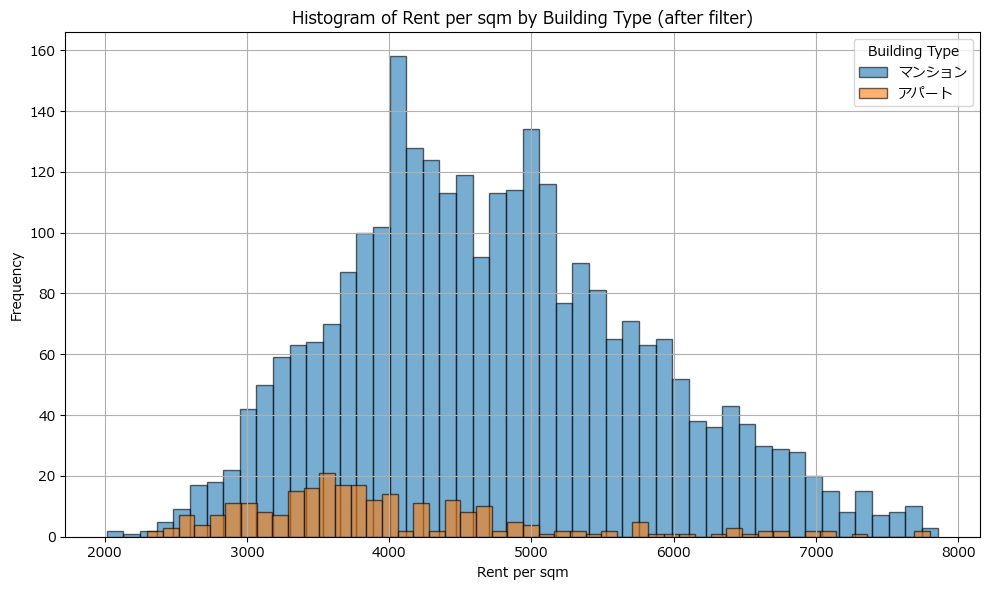

In [18]:
## Histogram again after filtering
# Set figure
plt.figure(figsize = (10, 6))

# Plot each building type
for btype in groups:
    subset = df_tokyo_target_filtered[df_tokyo_target_filtered["building_type"] == btype]
    plt.hist(
        subset["rent_per_sqm"],
        bins = 50,
        alpha = 0.6,
        label = btype,
        edgecolor = 'black'
    )

# Configure Plot elements
plt.rcParams['font.family'] = 'Meiryo'  # Specify font because default DejaVu Sans has no JP char
plt.xlabel("Rent per sqm")
plt.ylabel("Frequency")
plt.title("Histogram of Rent per sqm by Building Type (after filter)")
plt.legend(title = "Building Type")
plt.grid(True)
plt.tight_layout()
plt.show()

### l) Categorical and numerical encoding if necessary.

In [19]:
# categorical columns
categorical_cols = ["parsed_area",
                    "building_type",
                    "structure",
                    "parking_type",
                    "room_facing"
                    ]

# Encoded data frame
df_encoded = pd.get_dummies(df_tokyo_target_filtered,
                            columns = categorical_cols,
                            drop_first = True)

### m) Other pre-processing.

In [20]:
# train and test split
from sklearn.model_selection import train_test_split

# Set target and features
X = df_encoded.drop(columns = ["rent_per_sqm"])
y = df_encoded["rent_per_sqm"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 62548
)


In [21]:
# normalize feature
from sklearn.preprocessing import StandardScaler

# Initilize scaler
scaler = StandardScaler()

# Fit on training data, and training data only
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same paramters
X_test_scaled = scaler.transform(X_test)

In [23]:
# Debug
# Just to view scaled values in df form with col names
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns = X_train.columns,
    index = X_train.index
)

X_train_scaled_df.head()

,listing_floor,building_total_floor,listing_area,building_age,sep_bath_toilet,washlet,reheat_bath,dryer_in_bathroom,sep_bath_sink,aircon,...,parking_type_not-listed,parking_type_on-premise,room_facing_北,room_facing_北東,room_facing_北西,room_facing_南,room_facing_南東,room_facing_南西,room_facing_東,room_facing_西
872,-0.393887,-0.680839,-0.552296,-0.798018,0.43576,0.652762,-0.809580,0.760507,-1.316141,0.214021,...,0.576349,-0.310691,-0.253267,-0.24142,-0.217324,-0.542265,-0.348705,-0.333654,-0.39336,-0.370244
2177,6.522652,3.697633,1.836393,-0.732949,0.43576,0.652762,-0.809580,0.760507,0.759797,0.214021,...,0.576349,-0.310691,-0.253267,-0.24142,-0.217324,-0.542265,-0.348705,-0.333654,-0.39336,-0.370244
2390,1.843817,0.778652,-0.281154,-1.383643,0.43576,0.652762,1.235208,0.760507,0.759797,0.214021,...,-1.735060,3.218634,-0.253267,-0.24142,-0.217324,-0.542265,-0.348705,-0.333654,-0.39336,2.700919
1107,-0.393887,-0.282796,0.141209,-0.017184,0.43576,0.652762,1.235208,0.760507,0.759797,0.214021,...,0.576349,-0.310691,-0.253267,-0.24142,-0.217324,-0.542265,-0.348705,-0.333654,-0.39336,-0.370244
1815,-0.800743,-0.813520,-0.007368,0.047885,0.43576,0.652762,1.235208,-1.314912,0.759797,0.214021,...,-1.735060,3.218634,-0.253267,-0.24142,-0.217324,1.844116,-0.348705,-0.333654,-0.39336,-0.370244


In [24]:
# Add function to plot residual diagnostics downstream
# Save myself some typing...
import matplotlib.pyplot as plt

def plot_resid_diagnostics(y_pred, y_actual,
                           title_prefix = None, title_suffix = None,
                           y_lab = "Response"):
    # Compute residuals
    residuals = y_actual - y_pred

    # Handle title formatting
    def make_title(core):
        parts = [title_prefix, core, title_suffix]
        return " - ".join([p for p in parts if p])
    
    # Plot 1: Residuals v. Predicted
    plt.figure(figsize = (8, 5))
    plt.scatter(y_pred, residuals, alpha = 0.5)
    plt.axhline(0, color = "red", linestyle = "--")
    plt.xlabel("Predicted " + y_lab)
    plt.ylabel("Residuals")
    plt.title(make_title("Residual Plot: Predicted vs Residuals"))
    plt.tight_layout()
    plt.show()

    # Plot 2: Actual v. Predicted
    plt.figure(figsize = (8, 5))
    plt.scatter(y_pred, y_actual, alpha = 0.5)
    plt.axline((0, 0), slope = 1, color = "red", linestyle = "--")
    plt.xlabel("Predicted " + y_lab)
    plt.ylabel("Actual " + y_lab)
    plt.title(make_title("Actual vs Predicted"))
    plt.tight_layout()
    plt.show()
                         

## 4. Technique 1 (16 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

Since our target variable (rent per square meter) is continuous, a regression model is appropriate.

I selected **Ridge regression** as the first technique due to its balance of simplicity, interpretability, and **robustsness to multicollinearity**. While the dataset is not excessively high-dimensional, it includes over 40 encoded features, several of which may be partially correlated (e.g. layout component, building characteristics).

The ridge regression loss function given as:

$$
\overline{J^2}(\mathbf{w}) = \frac{1}{2N} \left(
\underbrace{\left\| \mathbf{t} - \boldsymbol{\Phi} \mathbf{w} \right\|^2}_{\text{Error Term}} +
\underbrace{\lambda \left\| \mathbf{w} \right\|^2}_{\text{Regularization Term}}
\right)
$$


The inclusion of regularization term $\lambda$ to the loss function discourages large weights by penalizing their magnitude ($ \left\| \mathbf{w} \right\|^2$). This helps stabilizes the weights especially in situation where collinearity might exist to inflate the magnitude.

Moreover, with only ~2,300 samples in the training set, Ridge regression can be efficiently solved via closed-form matrix operation rather than numerical proximation method like gradient descent.

**Summary schematic**

[Data Preparation] ---> [Normalized Features] ---> [Train/Test Split] ---> [Cross-validated Hyperparameter Optimization] ---> [Ridge Regression Model] ---> [Predicted Rent per sqm]

### b) Setting hyperparameters (rationale)

The key hyperparameter in Ridge regression is the **regularization strength $\lambda$**, referred to as `alpha` in `sklearn`. This parameter balances model fit and complexity and must be chosen carefully:
- Low $\lambda$ could lead to overfitting
- High $\lambda$ could lead to underfitting

To identify the optimal value of lambda, I use cross-validated grid search over a logarithmically spaced range of candidate values. This range spans small to large regularization values, allowing us to systematically explore the effect of regularization on generalization performance.


In [26]:
import numpy as np
# alpha candidates
alphas = np.logspace(-2, 2, 30)

print(alphas)

[1.00000000e-02 1.37382380e-02 1.88739182e-02 2.59294380e-02
 3.56224789e-02 4.89390092e-02 6.72335754e-02 9.23670857e-02
 1.26896100e-01 1.74332882e-01 2.39502662e-01 3.29034456e-01
 4.52035366e-01 6.21016942e-01 8.53167852e-01 1.17210230e+00
 1.61026203e+00 2.21221629e+00 3.03919538e+00 4.17531894e+00
 5.73615251e+00 7.88046282e+00 1.08263673e+01 1.48735211e+01
 2.04335972e+01 2.80721620e+01 3.85662042e+01 5.29831691e+01
 7.27895384e+01 1.00000000e+02]


### c) Optimising hyperparameters appropriately


In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge model
ridge = Ridge()

# Grid search with 5-fold cross-validation
param_grid = {"alpha": alphas}
ridge_cv = GridSearchCV(ridge, param_grid, cv = 5,
                        scoring = "neg_root_mean_squared_error")
ridge_cv.fit(X_train_scaled, y_train)

# Best alpha
best_alpha = ridge_cv.best_params_["alpha"]
print(f"Best alpha: {best_alpha}")

# Best model
best_ridge = ridge_cv.best_estimator_

Best alpha: 10.82636733874054


### d) Performance metrics for training set

In [28]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Predict on training set using best model
y_train_pred = best_ridge.predict(X_train_scaled)

# Metrics
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")


Train RMSE: 720.5171676099492
Train R^2: 0.5494758381985687


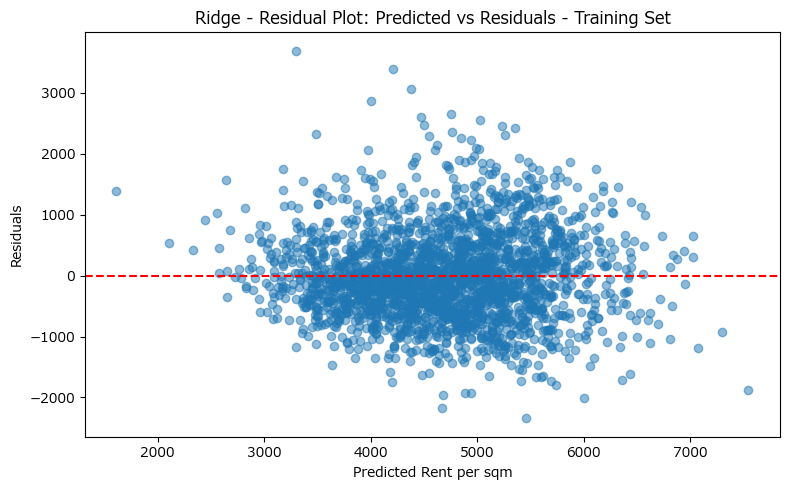

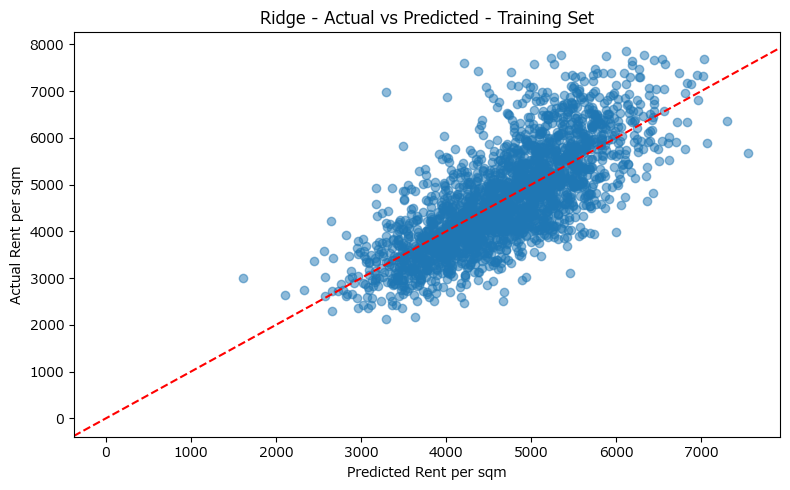

In [29]:
# Residual plot
plot_resid_diagnostics(y_train_pred, y_train,
                       title_prefix="Ridge", title_suffix="Training Set",
                       y_lab="Rent per sqm")



### e) Other items necessary for the technique.

Great thing about ridge regression is that just like other linear regression, there are interpretable coefficients you can review to gain further insights.

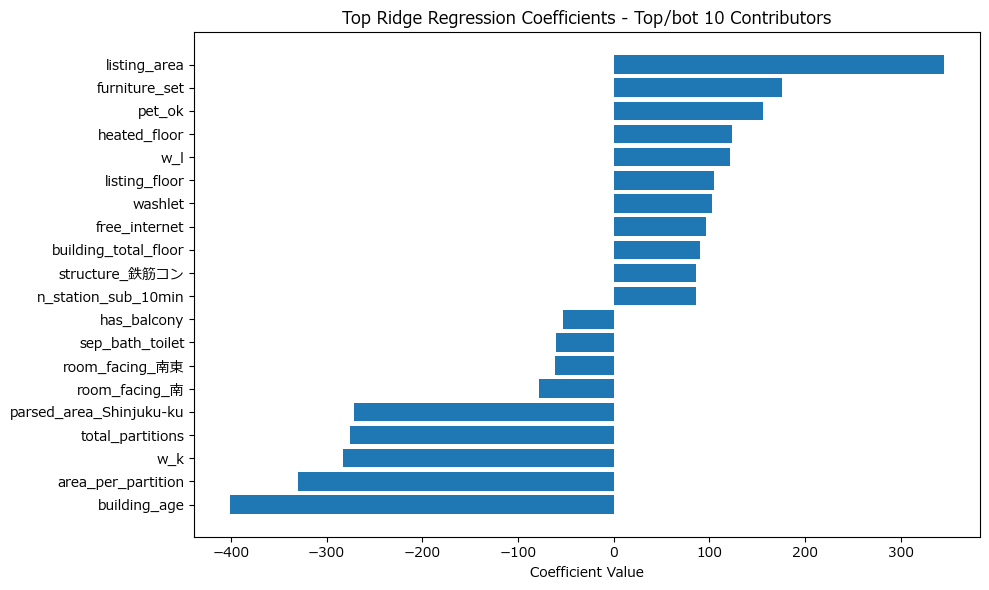

In [48]:
## Extract coefficient

# Get feature names
feature_names = X_train.columns

# Get coefficients from best ridge model
ridge_coefs = best_ridge.coef_

# Combine into DataFrame
ridge_coefs_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": ridge_coefs
                                # Sort by absolute value, so we see magnitude on both
                                # negative and positive end
}).sort_values(by = "Coefficient", key = abs, ascending = False)

# Plot
import matplotlib.pyplot as plt

n = 20
top_coef = ridge_coefs_df.iloc[:n].sort_values("Coefficient")

plt.figure(figsize = (10, 6))
plt.barh(top_coef["Feature"], top_coef["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title(f"Top Ridge Regression Coefficients - Top/bot {int(n/2)} Contributors")
plt.tight_layout()
plt.show()

### f) Deal with class imbalance, if necessary, if not done above.

In [137]:
# Regression model, so don't need to worry about class imbalance as much

## 5. Technique 2 (16 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

For the second technique, I selected a **neural network regressor** (multi-layer perceptron, MLP) to capture optential **non-linear relationships and interaction effects** that linear models like Ridge regression may miss.

The Ridge regression model above showed reasonable performance, but the residuals and modest $R^2$ suggest that linearity assumptions are likely too restrictive for the complexity of the rental market.

Neural networks offer a flexible functional form by composing weighted sums and nonlinear activation functions. This allows the model to implicity learn intricate relationships between features like:
- nonlinear effect of `building_age`
- interaction between train station proximity to and walk time
- ... and more

**Summary Schematics**

[Data Preparation] ---> [Normalized Features] ---> [Train/Test Split] ---> [Cross-validated Hyperparameter Optimization] ---> [MLP model fitting] ---> [Predicted Rent per sqm]

### b) Setting hyperparameters (rationale)

There are quite a few relevant hyperparameters with regard to `sklearn`'s `MLPRegressor`. [link](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

**Hyperparameters set to fixed**

| Hyperparameter | Select Value | Rationale |
|----------------|--------------|-----------|
| `loss` | `squared_error` | Most common metrics, default in `sklearn` |
| `activation` | `relu` | Generally robust for regression; also default in `sklearn`|
| `solver` | `adam` | Default in `sklearn` |
| `max_iter` | 1000 | Bit more than default 200, give the algorithm some room to run |
| `early_stopping` | `True` | Prevent overfitting by halting when validation score stops improving |

**Hyperparameters to tune**

| Hyperparameter | Reason to Tune | Tune Range |
| -------------- | --------------| ------------|
| `hidden_layer_sizes` | Controls model capacity and non-linearity depth | [(50,), (100,), (50, 50)] |
| `alpha` | Regularizaiton strength to moderate overfitting | [0.0001, 0.001, 0.01] |
| `learning_rate_init` | Can affect convergence and stability | [0.001, 0.01, 0.1] |



### c) Optimising hyperparameters appropriately


In [138]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from os import cpu_count

# Initialize model
mlp = MLPRegressor(
    activation = "relu",
    solver = "adam",
    max_iter = 1000,
    early_stopping = True,
    random_state = 365547
)

# Define hyperparameter grid
param_grid = {
    "hidden_layer_sizes": [(50, ), (100, ), (50, 50)],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01, 0.1]
}

# Grid search with 5-fold CV on training set
grid_search_mlp = GridSearchCV(
    mlp,
    param_grid=param_grid,
    cv = 5,
    scoring = "neg_mean_squared_error",
    verbose = 2,
    n_jobs = max(1, os.cpu_count() - 1) # enable parallel processing, max cores - 1
)

# Run Search
grid_search_mlp.fit(X_train_scaled, y_train)

# Best model
best_mlp = grid_search_mlp.best_estimator_
print("Best hyperparameters:", grid_search_mlp.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}


### d) Performance metrics for training set

In [139]:
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

# Predict on training set
y_train_pred_mlp = best_mlp.predict(X_train_scaled)

# Metrics
rmse_train_mlp = root_mean_squared_error(y_train, y_train_pred_mlp)
r2_train_mlp = r2_score(y_train, y_train_pred_mlp)

print(f"Train RMSE: {rmse_train_mlp}")
print(f"Train R^2: {r2_train_mlp}")

Train RMSE: 553.6105052371432
Train R^2: 0.7340266848991752


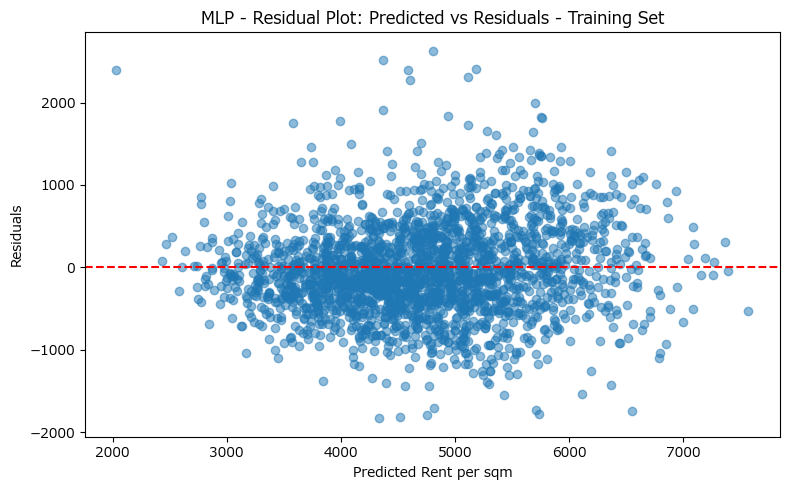

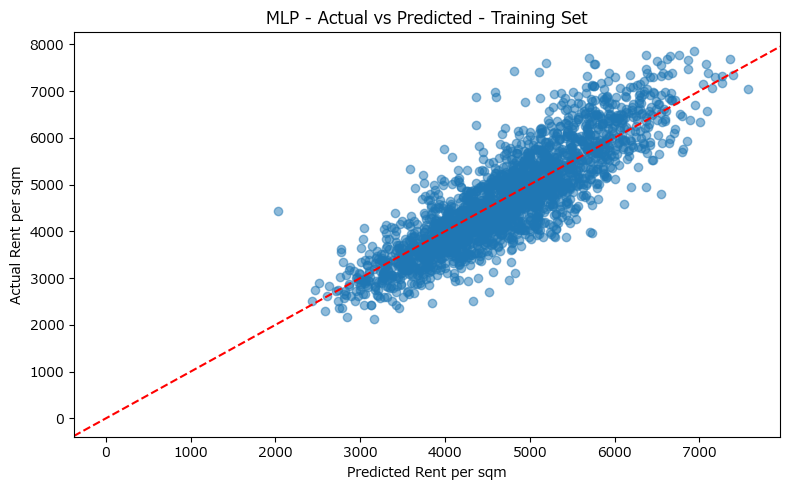

In [ ]:
# Residual plot
import matplotlib.pyplot as plt
import numpy as np

plot_resid_diagnostics(y_train_pred_mlp, y_train,
                       title_prefix="MLP", title_suffix="Training Set",
                       y_lab="Rent per sqm")


### e) Other items necessary for the technique.

In [ ]:
# NA

### f) Deal with class imbalance, if necessary, if not done above.

In [ ]:
# NA

## 6. Comparison of metrics performance for testing (16 marks)

### a) Use of cross validation for both techniques to deal with overfitting model selection and model comparison.

Both models were trained and tuned using cross-validation (`GridSearchCV`) to reduce overfitting and test for generalizability:
- **Ridge Regression**: optimized for $\lambda$ (`alpha` in `Ridge`)
- **MLP Regressor**: optimized for hidden layer size, learning rate, and regularization strength

Below is a comparison of the cross-validated models' performance on training data:

In [143]:
# Cross-validated training summary
train_summary = pd.DataFrame({
    "Model": ["Ridge Regression", "MLPRegressor"],
    "RMSE (Train)": [rmse_train, rmse_train_mlp],
    "R^2 (Train)": [r2_train, r2_train_mlp]
})

print(train_summary)

              Model  RMSE (Train)  R^2 (Train)
0  Ridge Regression    720.517168     0.549476
1      MLPRegressor    553.610505     0.734027


### b) Use appropriate metrics for testing set

In [150]:
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

# Predict on testing set
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
y_test_pred_mlp = best_mlp.predict(X_test_scaled)

# Metrics
## Ridge
rmse_test_ridge = root_mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
## MLP
rmse_test_mlp = root_mean_squared_error(y_test, y_test_pred_mlp)
r2_test_mlp = r2_score(y_test, y_test_pred_mlp)

train_summary["RMSE (Test)"] = [rmse_test_ridge, rmse_test_mlp]
train_summary["R^2 (Test)"] = [r2_test_ridge, r2_test_mlp]

print(train_summary)

              Model  RMSE (Train)  R^2 (Train)  RMSE (Test)  R^2 (Test)
0  Ridge Regression    720.517168     0.549476   756.409128    0.557664
1      MLPRegressor    553.610505     0.734027   723.196115    0.595656


### c) Use an appropriate model selection visualization curve (ROC, PR etc.) that is suitable for the problem at hand

In [151]:
# This is more suited to classification/clustering problems
# So NA

### d) Checking for overfitting

Ridge regression's performance gap between training and testing set remain fairly consistent ($R^2_{train} = 0.549$ -> $R^2_{test} = 0.558$).

But MLP regressor's performance worsened moderately ($R^2_{train} = 0.734$ -> $R^2_{test} = 0.596$) in test set. Now it only perform slighly better than Ridge regression. This performance gap is a strong sign of overfitting in training data.

See summary stats below:

In [154]:
print(train_summary)

              Model  RMSE (Train)  R^2 (Train)  RMSE (Test)  R^2 (Test)
0  Ridge Regression    720.517168     0.549476   756.409128    0.557664
1      MLPRegressor    553.610505     0.734027   723.196115    0.595656


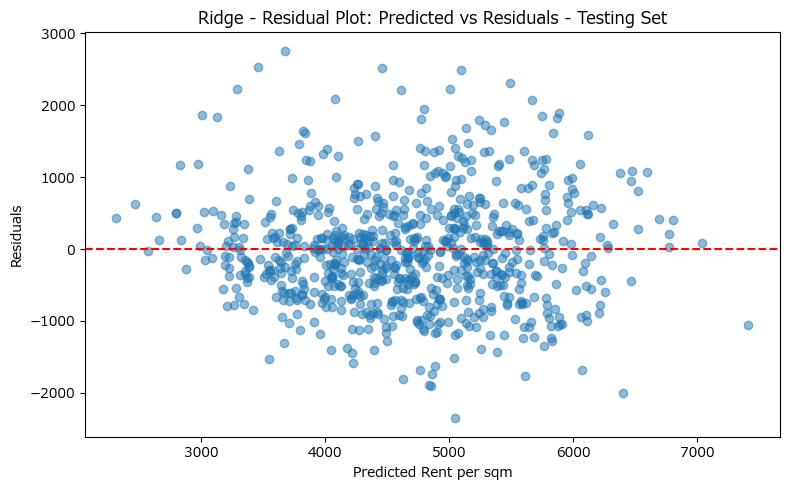

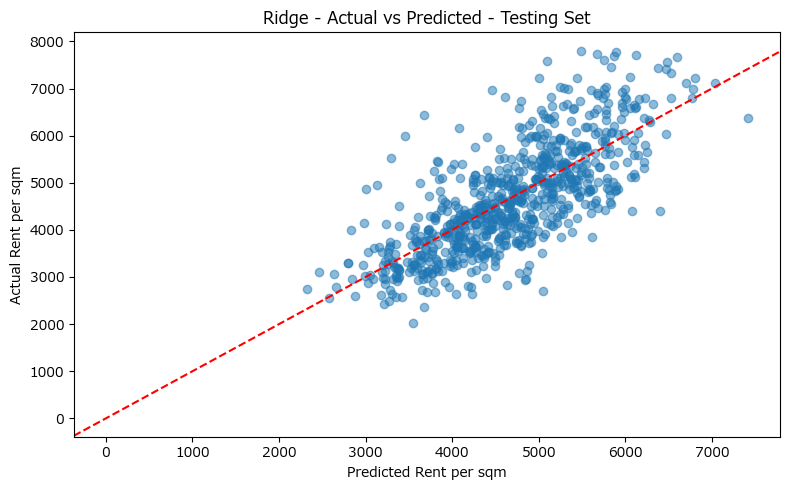

In [155]:
plot_resid_diagnostics(y_test_pred_ridge, y_test,
                       title_prefix="Ridge", title_suffix="Testing Set",
                       y_lab="Rent per sqm")

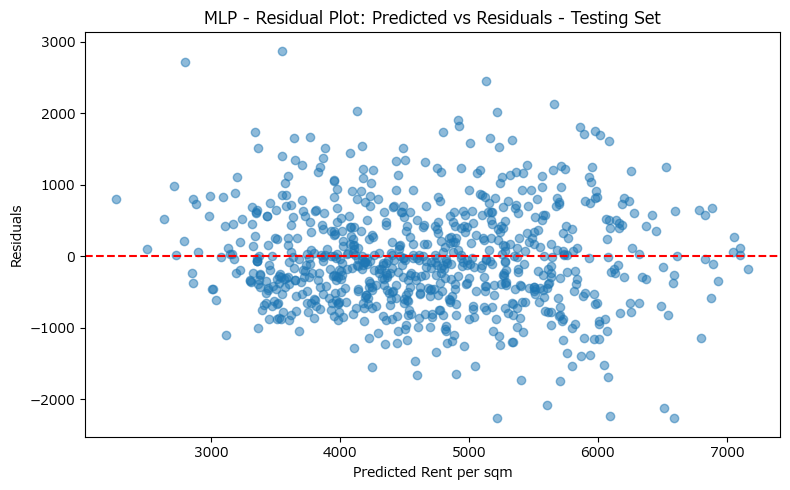

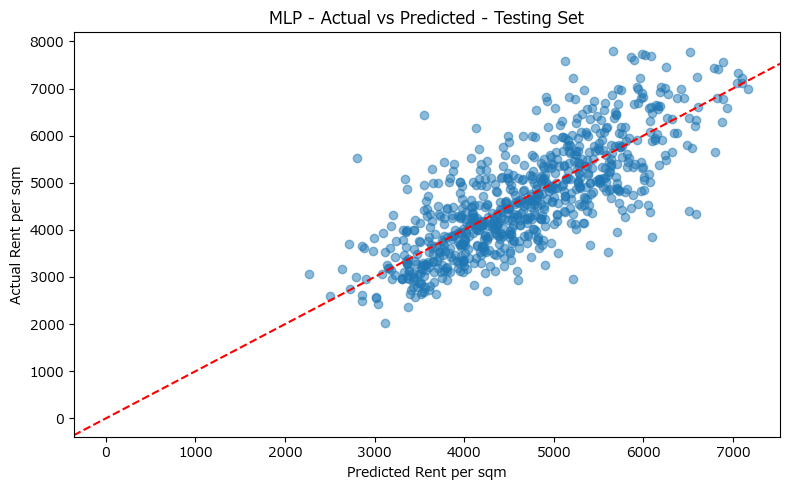

In [156]:
plot_resid_diagnostics(y_test_pred_mlp, y_test,
                       title_prefix="MLP", title_suffix="Testing Set",
                       y_lab="Rent per sqm")

## 7. Final recommendation of best model (4 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

Both **Ridge regression** and **multi-layer perceptron (MLP) regression** demonstrated competent performance in predicting rent per square meter on this data set. However, notable differences emerged in terms of model complexity, generalization, and computational efficiency.

**Predictive Performance**

Ridge regression yielded an $R^2$ of approximately 0.55 on both training and testing datasets, indicating modest but stable predictive performance with no evident signs of overfitting. In contrast, the MLP regressor achieved a substantially higher $R^2$ on the training set (0.73), but this value dropped to 0.60 on the testing set. This gap suggests that while the MLP was able to model more complex, nonlinear relationships in the training data, it exhibited some degree of overfitting and reduced generalization.

**Model Complexity and Training Efficiency**

Ridge regression is a linear model with L2 regularization and admits a closed-form solution, making it computationally efficient an interpretable. It is particularly well-suited for problems with potential multicollinearity, as was expected in dataset of this nature as well as expanded features due to multiple encoded categorical variables. On the other hand, the MLP regressor relies in iterative numerical optimization via stochastic gradient descent and requires tunining far more hyperparameters, e.g. learning rate, regularization strength, size of hidden layer, etc. This increases training time and model complexity, though it also provides greater flexibility to capture nonlinear interactions.

**Robustness and Practicality**

In practice, the ridge regression model is more robust to generalization, faster to train, and easier to interpret, making it an ideal candidate for deployment in resource-constrained environments or scenarios requiring model transparency. The MLP, while more expressive, demands greater attention to model tuning and is more susceptible to variance in predictive performance across different data splits.

In conclusion, while the MLP model showed better performance on the training data and marginal improvement on the test set, the ridge regression model offers a better balance of stability, efficiency, and interpretability.

In [157]:
print(train_summary)

              Model  RMSE (Train)  R^2 (Train)  RMSE (Test)  R^2 (Test)
0  Ridge Regression    720.517168     0.549476   756.409128    0.557664
1      MLPRegressor    553.610505     0.734027   723.196115    0.595656


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

From a business standpoint, model selection must account not only for predictive accuracy, but also for robustness and deployment context. While the MLP regressor delivered marginally better predictive performance on the test set compared to ridge regression, this advantage must be interpreted with caution.

The current dataset is limited to three central Tokyo wards: Minato-ku, Shinjuku-ku, and Shibuya-ku. As such the model is not trained on the full range of Tokyo's rental market. If this model is to be deployed directly, particularly for predicting listing rent from outside the training geography, its generalizability could be a key stumbling block. In contrast, ridge regression exhibited far more consistent performance across training and testing data, making it a more conservative but potentially more reliable choice for out-of-sample prediction.

That said, should additional data be gathered to represent a wider range of listings, the MLP's capacity to learn complex, nonlinear relationships could translate into meaningful gains in predictive accuracy. With expansion of training data set and the judicious application of techniques such as early-stopping and cross-validated hyperparameter tuning, the generalization performance is likely to improve.

In summary, while the MLP model may at present offer the best in-sample performance, the ridge regression model may be more suitable for near-term deployment due to its greater robustness and consistency. The optimal business choice depends on the intended use case: general-purpose deployment across wider segment of Tokyo rental market would favour ridge regression, whereas a well-scoped model supported by richer training data could justify the use of a neural network.

## 8. Conclusion (4 marks)

### a) What has been successfully accomplished and what has not been successful?

This project successfully implemented and compared two regression techniques, **ridge regression** and **multi-layer perceptron (MLP)**, on a real-world rental dataset derived from web-scraped listings in central Tokyo. The workflow covered preprocessing, including feature extraction, collinearity handling, normalization, and categorical variable encoding. Both models were turned using cross-validation and evaluated on separate training and testing sets.

While the ridge regression model offered robust and interpretable coefficients, the MLP demonstrated better capacity for capturing nonlinear patterns. However, the latter model showed sizable reduction in $R^2$ from training set to testing set, showing limitation with generalizability. Neither models achieved sufficient performance threshold to warrant deployment.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

In hindsight, a few changes could have improved the overall effectiveness of the models. Most notably, including a broader geographic sample beyond the three selected wards would likely have enhanced generalizability. Additionally, systematic feature transformation, such as spline-based modeling for building age or interaction terms, might have improved the linear model's performance without needing to resort to more complex models. Also, formal diagnostic checks (e.g. VIF for collinearity) could have been integrated to support model selection.

### c) Provide a wish list of future work that you would like to do to take the project forward

Future work could focus on expanding the dataset to include all 23 Tokyo wards and possibly other major metropolitan areas in Japan. This would support the training of more generalizable models. Exploring other modeling techniques, such as gradient boosting or tree-based model, could also improve performance. From a feature perspective, using spatial coordinates or publicly available GIS data (e.g., proximity to commercial centers, schools, or parks) may further enrich the feature space, though the added complexity will need to be weighed against the benefit. Finally, deploying the final model as a simple web app could allow users to estimate rental prices interactively, demonstrating real-world utility.

## 9. Bibliography (References)

- `sklearn` `Ridge` Ridge regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- `sklearn` `GridSearchCV`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    - String Name scorers: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names
- `sklearn` `MLPregressor`Neural network regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


## 10. Appendices